In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import ticker

In [3]:
zebra = np.array(Image.open('zebra.jpg'))
# leaf_recon = np.load('leaf.npy')

In [17]:
current_height = 480
current_width = 480
[i_height,i_width] = [350,120]
sigma = 165
tsg_far = np.array([[np.exp(-(i_ref_p**2+j_ref_p**2)/(2*sigma**2))\
            for j_ref_p in range(-i_width+1,current_width-i_width+1)]\
            for i_ref_p in range(-i_height+1,current_height-i_height+1)])
tsg_far = tsg_far/np.sum(tsg_far)
# [i_height,i_width] = [390,160]
sigma = 45
tsg_mid = np.array([[np.exp(-(i_ref_p**2+j_ref_p**2)/(2*sigma**2))\
            for j_ref_p in range(-i_width+1,current_width-i_width+1)]\
            for i_ref_p in range(-i_height+1,current_height-i_height+1)])
tsg_mid = tsg_mid/np.sum(tsg_mid)
# [i_height,i_width] = [260,230]
# sigma = 1
# tsg_near = np.array([[np.exp(-(i_ref_p**2+j_ref_p**2)/(2*sigma**2))\
#             for j_ref_p in range(-i_width+1,current_width-i_width+1)]\
#             for i_ref_p in range(-i_height+1,current_height-i_height+1)])
# tsg_near = tsg_near/np.sum(tsg_near)

In [4]:
# near_maxp = np.max(tsg_near)
# tsg_near[260-3:260+4,230-3:230+4] = near_maxp

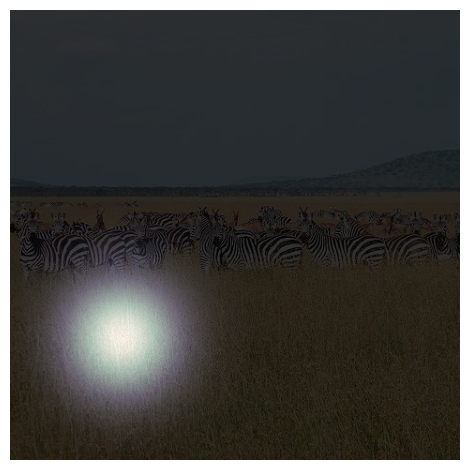

In [20]:
plt.plot(figsize=(5,5))
plt.imshow(zebra)
plt.imshow(tsg_mid,cmap='bone',alpha=0.8)
plt.axis('off')
plt.tight_layout()
plt.savefig('tsg_on_img.png',bbox_inches='tight',pad_inches=0)

NameError: name 'tsg_near' is not defined

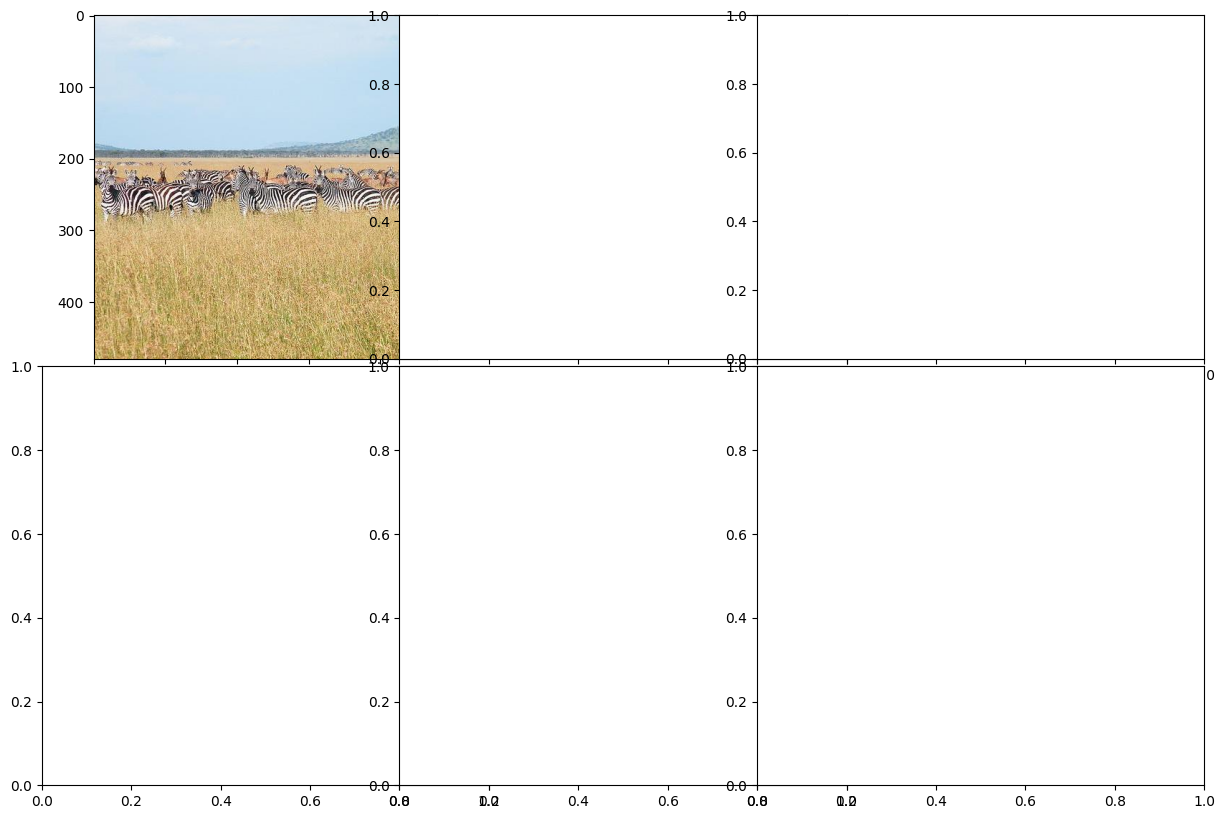

In [10]:
fig,ax = plt.subplots(2,3,figsize=(15,10),gridspec_kw={'height_ratios': [0.82, 1]})
plt.subplots_adjust(wspace=-.2,hspace=.02)
ax[0,0].imshow(leaf)
near = ax[0,0].imshow(tsg_near,cmap='bone',alpha=0.8)
ax[0,0].set_title(r'Small $\sigma$',fontsize=16)
ax[0,0].axis('off')
ax[0,0].set_ylabel('Reference')
ax[0,1].imshow(leaf)
mid = ax[0,1].imshow(tsg_mid,cmap='bone',alpha=0.8)
ax[0,1].set_title(r'Medium $\sigma$',fontsize=16)
ax[0,1].axis('off')
ax[0,2].imshow(leaf)
far = ax[0,2].imshow(tsg_far,cmap='bone',alpha=0.8)
ax[0,2].set_title(r'Large $\sigma$',fontsize=16)
ax[0,2].axis('off')
ax[1,0].imshow(leaf_recon)
ax[1,0].imshow(tsg_near,cmap='bone',alpha=0.8)
ax[1,0].axis('off')
ax[1,0].set_ylabel('Reproduction', rotation=0, fontsize=24)
ax[1,1].imshow(leaf_recon)
ax[1,1].imshow(tsg_mid,cmap='bone',alpha=0.8)
ax[1,1].axis('off')
ax[1,2].imshow(leaf_recon)
ax[1,2].imshow(tsg_far,cmap='bone',alpha=0.8)
ax[1,2].axis('off')
plt.colorbar(near,ax=ax[1,0],shrink=0.7,pad=0.03,location='bottom')
cbar = plt.colorbar(mid,ax=ax[1,1],shrink=0.7,pad=0.03,location='bottom',format='%.0e')
tick_locator = ticker.LinearLocator(5)
cbar.locator = tick_locator
cbar.update_ticks()
plt.colorbar(far,ax=ax[1,2],shrink=0.7,pad=0.03,location='bottom',format='%.0e')
plt.text(0.095, 0.7, 'Source', fontsize=18, transform=plt.gcf().transFigure)
plt.text(0.03, 0.35, 'Reconstruction', fontsize=18, transform=plt.gcf().transFigure)
plt.text(0.24, 0.1, 'Fidelity', fontsize=18, transform=plt.gcf().transFigure)
plt.text(0.72, 0.1, 'Realism', fontsize=18, transform=plt.gcf().transFigure)
# plt.tight_layout()
plt.savefig('tsg_on_img.png',bbox_inches='tight')

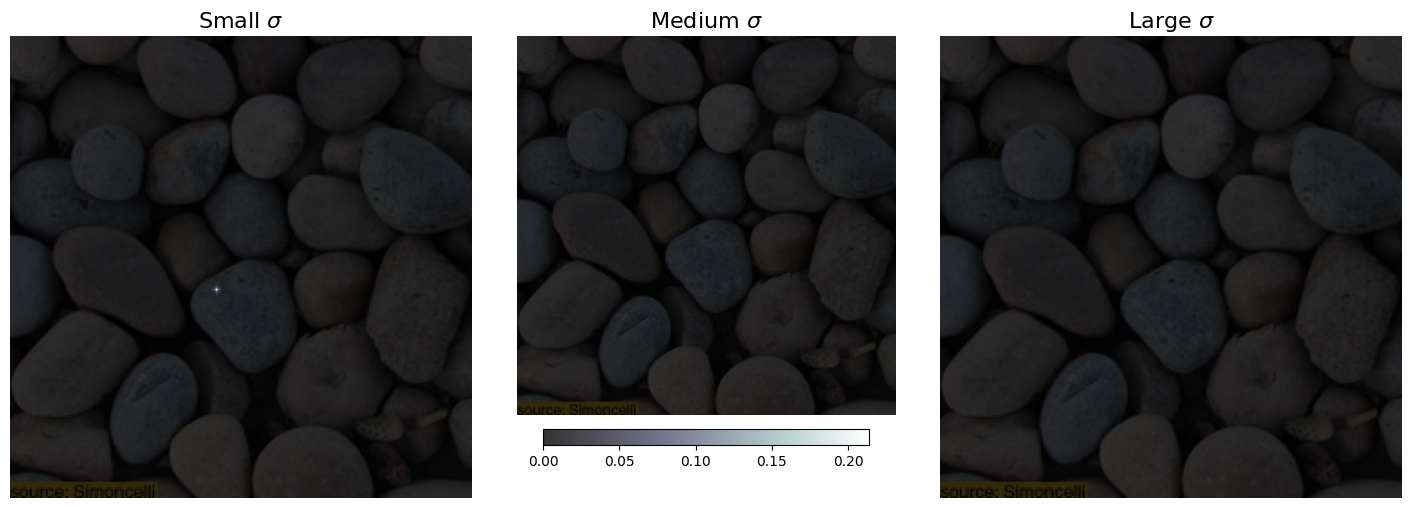

In [63]:
maxp = np.max(tsg_near)
fig,ax = plt.subplots(1,3,figsize=(18,6))
plt.subplots_adjust(wspace=0,hspace=.02)
ax[0].imshow(pebbles)
near = ax[0].imshow(tsg_near,cmap='bone',vmin=0,vmax=maxp,alpha=0.8)
ax[0].set_title(r'Small $\sigma$',fontsize=16)
ax[0].axis('off')
ax[1].imshow(pebbles)
mid = ax[1].imshow(tsg_mid,cmap='bone',vmin=0,vmax=maxp,alpha=0.8)
ax[1].set_title(r'Medium $\sigma$',fontsize=16)
ax[1].axis('off')
ax[2].imshow(pebbles)
far = ax[2].imshow(tsg_far,cmap='bone',vmin=0,vmax=maxp,alpha=0.8)
ax[2].set_title(r'Large $\sigma$',fontsize=16)
ax[2].axis('off')
plt.colorbar(near,ax=ax[1],shrink=0.7,pad=0.03,location='bottom')
# plt.colorbar(mid,ax=ax[1],shrink=0.7,pad=0.03,location='bottom',format='%.0e')
# plt.colorbar(far,ax=ax[2],shrink=0.7,pad=0.03,location='bottom',format='%.0e')
# plt.savefig('tsg_on_img_2.png',bbox_inches='tight')